In [1]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
                 parse_dates=["Date"],
                 index_col=["Date"])

df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [2]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "price"})

bitcoin_prices

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, 'BTC Price 01-10-2013 to 18-05-2021')

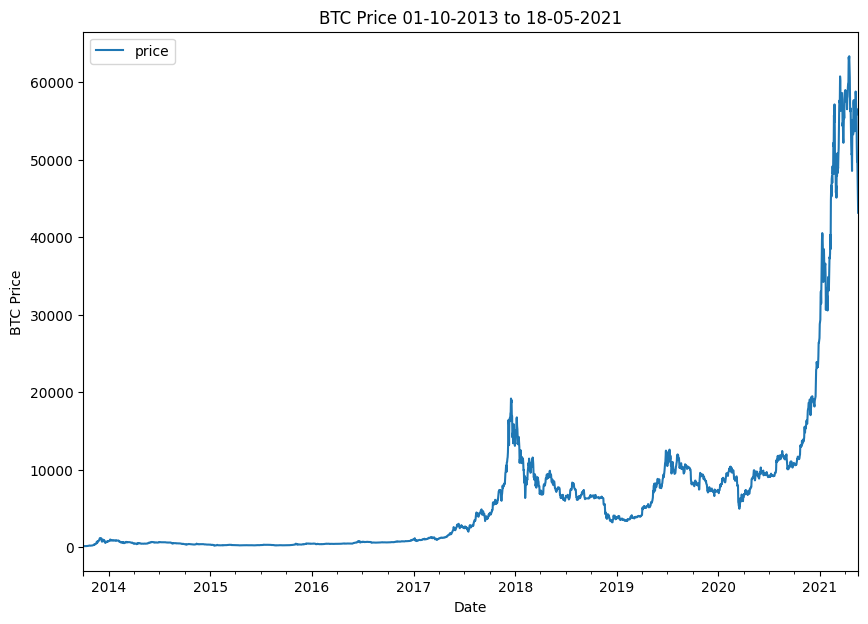

In [3]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("BTC Price 01-10-2013 to 18-05-2021")

In [4]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader, None)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2])) # get the closing price as float
        
# View first 10 of each

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

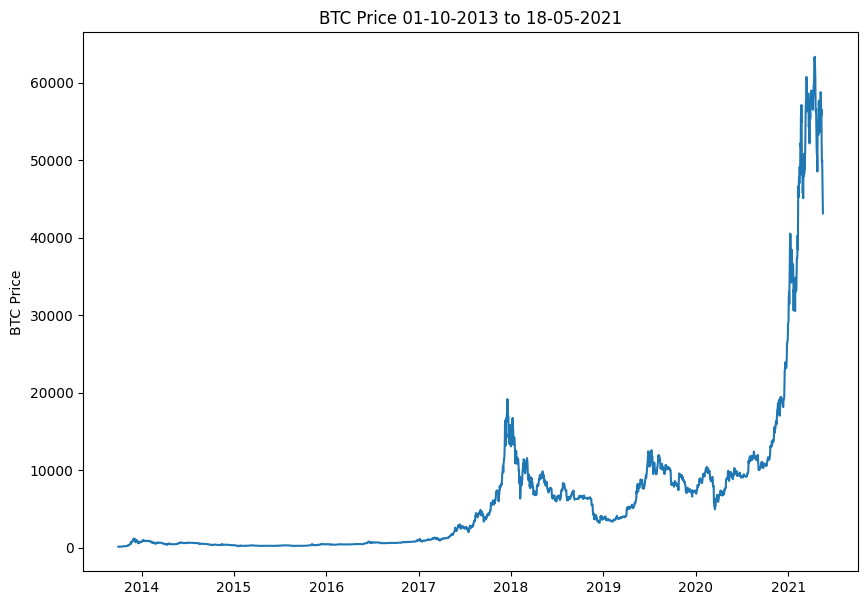

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("BTC Price 01-10-2013 to 18-05-2021")
plt.plot(timesteps, btc_price)

In [6]:
#  WRONG WAY 

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [7]:
#  WRONG WAY 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,  #dates
                                                    prices,  # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

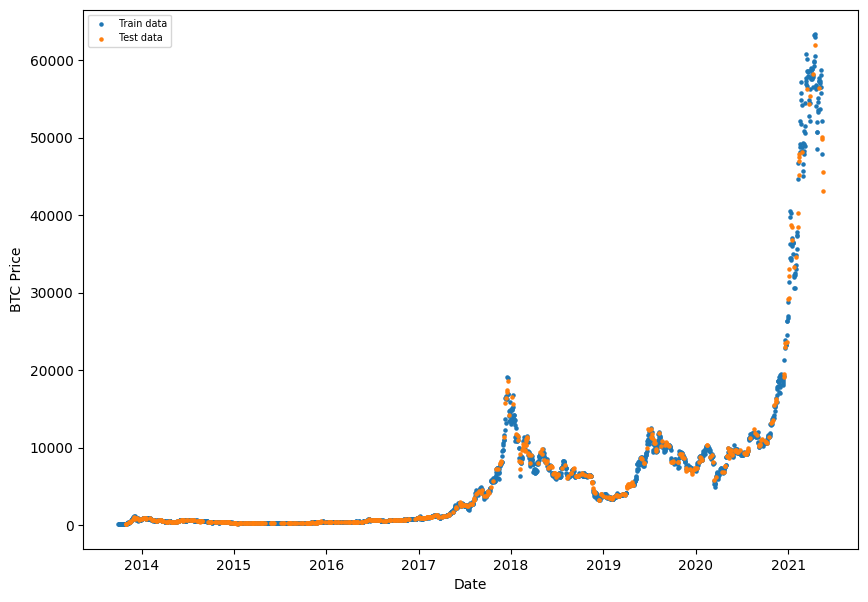

In [8]:
#  WRONG WAY 

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize="x-small")
plt.show()

In [9]:
####
# RIGHT WAY
####

In [10]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

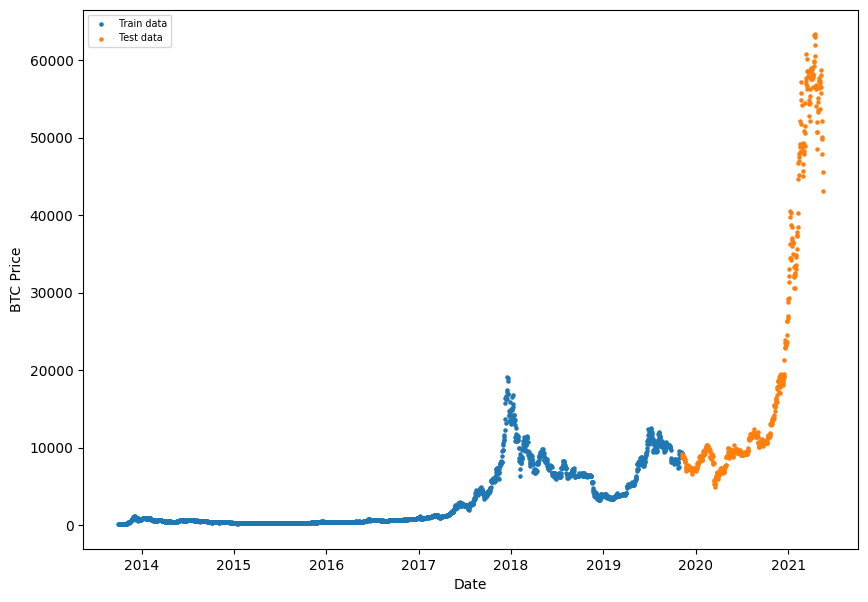

In [11]:
#  WRONG WAY 

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize="x-small")
plt.show()

In [12]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    plots teimesteps (a series of points in ttime against values a series of values across timestmeps) 
     
    :param timesteps: array of timestemp values 
    :param values:  array of values across time
    :param format:  style of plot
    :param start: where to start the plot (setting a value will index from start of timesteps
    :param end:  where to end the plot
    :param label:  where to end the plot
    :return: 
    """
    
    plt.plot(timesteps[start:end], values, format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

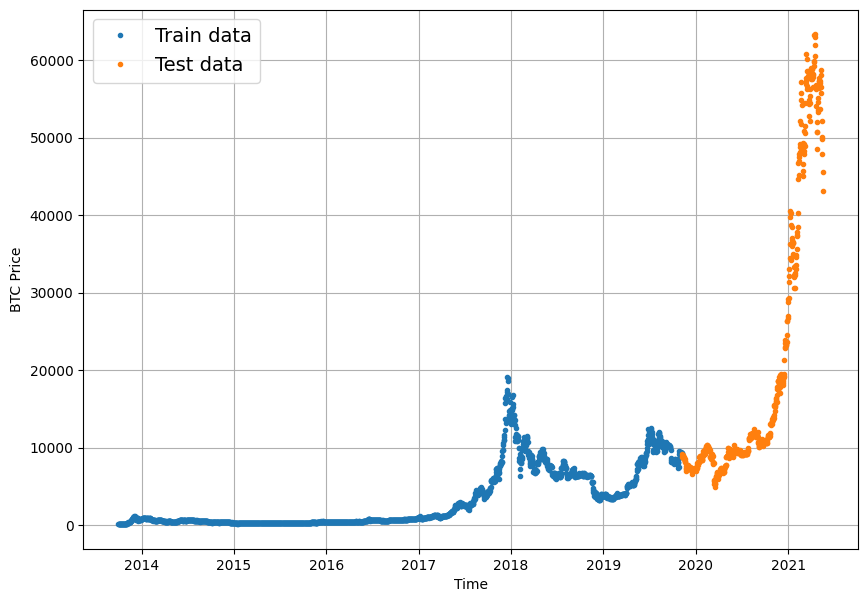

In [13]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Model experiments

* 0. Native model (baseline
* 1. Dense model
* 2. same as 1
* 3. same as 1
* 4. conv1d
* 5. lstm
* 6. same as 1 + multivariate data
* 7. n-beats algorithm
* 8. ensemble
* 9. future prediction model
* 10. same as 1 but with turkey

In [14]:
# Naive forecast

naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

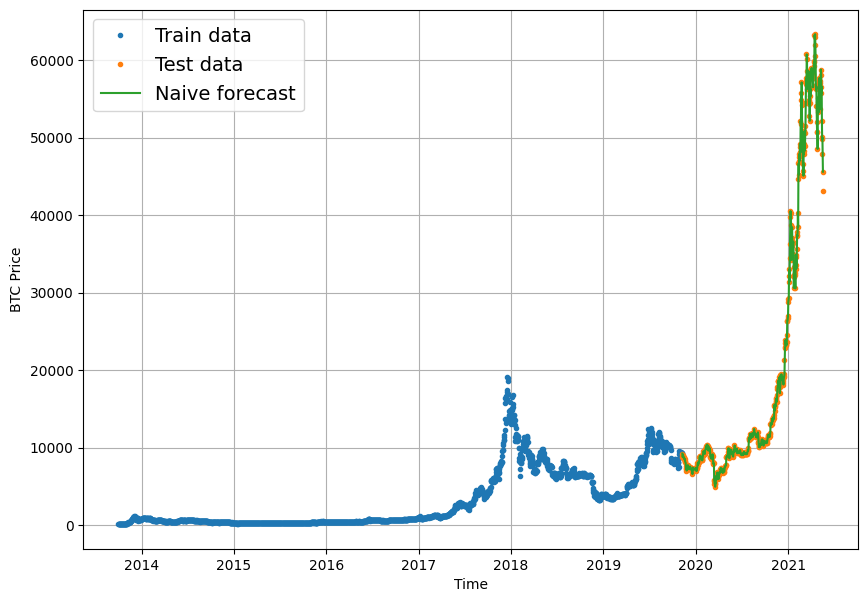

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

In [16]:
## Evaluating a time series model

import tensorflow as tf

#Mean absolute scale error implementation

def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming not seasonality of data) 
    """
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

In [17]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred= naive_forecast).numpy()

0.9995699939182624

In [18]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100
    mase = mean_absolute_scaled_error(y_true, y_pred)  # Custom implementation
    
    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy() if isinstance(mase, tf.Tensor) else mase
    }

In [19]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [20]:
HORIZON=1
WINDOW_SIZE=7

In [21]:
def get_labelled_window(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.
    e.g. if horizon=1
    input [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [22]:
test_window, test_labels = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_labels

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [23]:
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1d array in a 2d array of sequential labelled windows of window_size with horizon size labels
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(
        np.arange(len(x)-(window_size+horizon-1)), axis=0
    ).T
    
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels
    

In [24]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [25]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [26]:
# NB: tf.keras.preprocessing.timeseries_dataset_from_array() does everything above does 

In [27]:
# make train/test splits

def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Split matching pairs of windows and labels intro train and test splits 
    """
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows,  test_windows, train_labels, test_labels

In [28]:
# make a modelling checkpoint callback

import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    model_name = f"{model_name}.keras"
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              save_best_only=True, 
                                              verbose=0)

In [29]:
## Model 1: Dense model (window=7, horizon=1)
# Dense layer (128, Relu) output with linear activation
# Adam, MAE
# Batch=128 (not 32)
# 100 epochs

In [30]:
train_windows,  test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

model_1 = Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])



In [32]:
model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100, 
            verbose=1, 
            batch_size=128,
            validation_data=(test_windows, test_labels), 
            callbacks=[create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1472.7651 - mae: 1472.7651 - mse: 6265484.5000 - val_loss: 2459.3372 - val_mae: 2459.3372 - val_mse: 14708502.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 316.0931 - mae: 316.0931 - mse: 357775.5625 - val_loss: 1108.7815 - val_mae: 1108.7815 - val_mse: 3886886.7500
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 197.0581 - mae: 197.0581 - mse: 188184.4531 - val_loss: 1111.0377 - val_mae: 1111.0377 - val_mse: 3789220.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 183.0371 - mae: 183.0371 - mse: 170385.0625 - val_loss: 1026.5249 - val_mae: 1026.5249 - val_mse: 3391665.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 173.3074 - mae: 173.3074 - mse: 155537.4375 - val_loss: 970.7974 - val_mae: 970.7974 - val_mse: 3008234.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 163.6284 - mae: 163.6284 - mse: 141838.0000 - val_loss: 938.3575 - val_mae: 938.3575

In [33]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283.3900 - mae: 283.3900 - mse: 343118.6562


[566.2499389648438, 566.2499389648438, 1159177.125]

In [34]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")

model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 282.0894 - mae: 282.0894 - mse: 343477.2812


[565.4707641601562, 565.4707641601562, 1157316.5]

In [35]:
## making forecasts with a model
def make_preds(model, input_data):
    """
    uses model to make prediction on input_Data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [36]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.896, 8789.45 , 9045.566, 8775.937, 8753.351, 8759.858,
        8684.706, 8520.51 , 8479.978, 8534.064], dtype=float32)>)

In [37]:
tf.squeeze(test_labels.shape), model_1_preds.shape

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([556,   1])>,
 TensorShape([556]))

In [38]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 565.4708,
 'mse': 1157316.6,
 'rmse': 1075.7865,
 'mape': 2.5242836,
 'mase': 0.9933756}

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

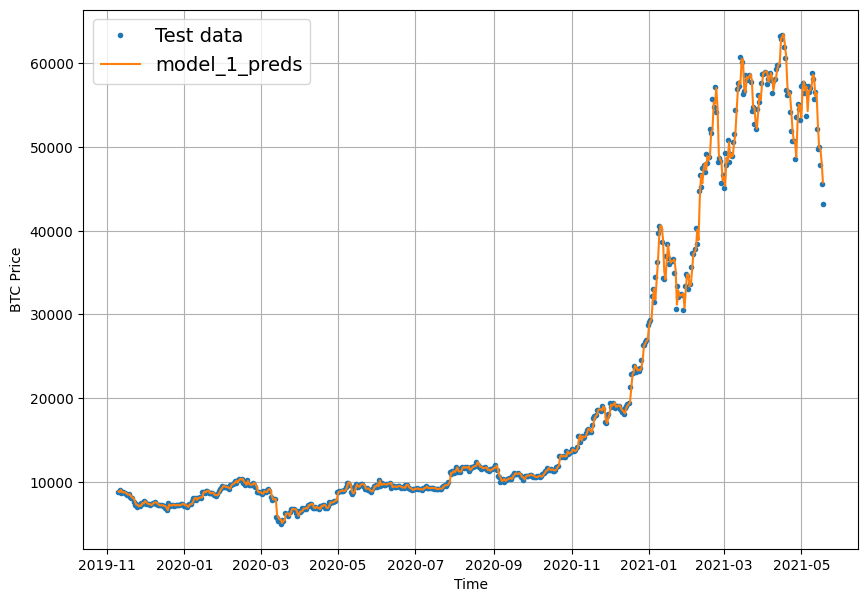

In [40]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 format="-",
                 label="model_1_preds")

##### SAME BUT WINDOW IS 30

In [41]:
WINDOW30 = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW30, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

In [42]:
model_2 = Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [43]:
model_2.fit(x=train_windows, 
            y=train_labels, 
            epochs=100, 
            verbose=0, 
            batch_size=128,
            validation_data=(test_windows, test_labels), 
            callbacks=[create_model_checkpoint(model_name = model_2.name)])

In [44]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315.5237 - mae: 315.5237 - mse: 389494.8750 


[615.889892578125, 615.889892578125, 1301614.875]

In [45]:
model_2_preds = make_preds(model_2, 
                           input_data=test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [46]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 615.88983,
 'mse': 1301614.9,
 'rmse': 1140.8834,
 'mape': 2.8060906,
 'mase': 1.0765814}

In [47]:
model_1_results

{'mae': 565.4708,
 'mse': 1157316.6,
 'rmse': 1075.7865,
 'mape': 2.5242836,
 'mase': 0.9933756}

In [48]:
# conv1d

In [49]:
WINDOW_SIZE = 7
HORIZON = 1

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON) 

In [50]:
len(full_windows)

2780

In [51]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows)

2224

In [52]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [53]:
import tensorflow as tf
from tensorflow.keras import layers

expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))

In [54]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [55]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

In [56]:
model_4.fit(x=train_windows, 
            y=train_labels, 
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2246.9551 - val_loss: 6885.4141
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 938.6497 - val_loss: 4991.0298
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 713.2656 - val_loss: 3507.5422
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 525.6711 - val_loss: 2783.8679
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 432.1762 - val_loss: 2360.7405
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 374.8295 - val_loss: 2089.2559
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 335.5934 - val_loss: 1905.8157
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 306.1225 - val_loss: 1724.9368
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 278.4780 - val_loss: 1554.0200
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 251.9403 - val_loss: 1401.6832
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 231.2071 - val_loss: 1300.05

In [57]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 7, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 7, 128)         │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

In [58]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 597.6487 


1220.052734375

In [59]:
# RNN LSTM 

In [60]:
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name = "model_5_LSTM")

In [61]:
model_5.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

In [62]:
model_5.fit(x=train_windows, 
            y=train_labels, 
            epochs=200, 
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name = model_5.name)])

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2578.3196 - val_loss: 9252.8545
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1066.9250 - val_loss: 1162.8557
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 259.6524 - val_loss: 1345.2024
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 207.0073 - val_loss: 1039.4509
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 182.0717 - val_loss: 1037.7833
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 179.3017 - val_loss: 1051.3701
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 178.0860 - val_loss: 1053.1282
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 177.1482 - val_loss: 1047.9227
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175.9892 - val_loss: 1040.5923
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 174.6586 - val_loss: 1026.7053
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 173.0659 - val_loss: 1021.5932
Epoc

In [63]:
model_5.evaluate(test_windows, test_labels)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 281.3625 


564.9589233398438

In [64]:
model_5_preds = make_preds(model_5, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [65]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_5_preds)
model_5_results


{'mae': 564.9589,
 'mse': 1158032.0,
 'rmse': 1076.1189,
 'mape': 2.5321016,
 'mase': 0.99247634}

In [66]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [67]:
## MULTIVARIATE

In [68]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [69]:
#block reward date
block_reward_1 = 50 # not in dataset
block_reward_2 = 25 # 8.11.2012
block_reward_3 = 12.5 # 9.7.206
block_reward_4 = 6.25 # 18.5.2020

#block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days


In [70]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block 

,price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

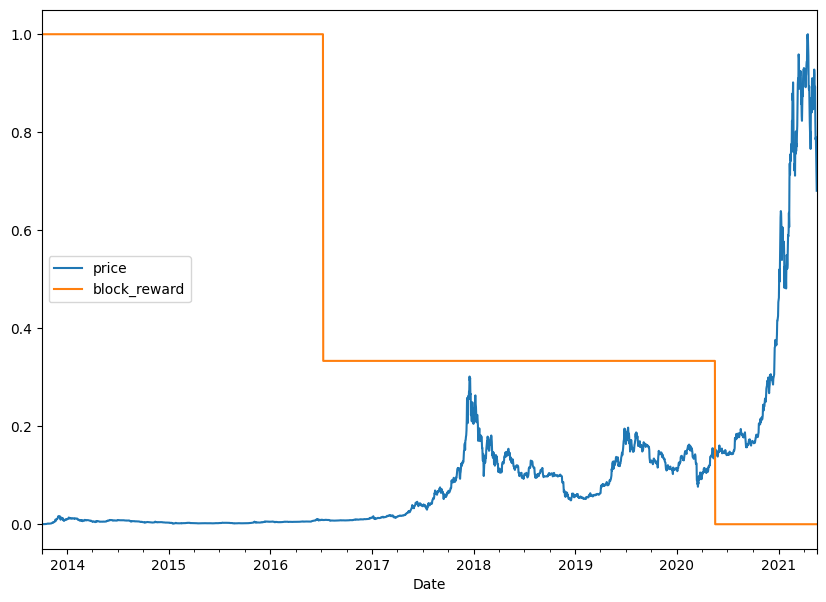

In [71]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["price", "block_reward"]]),
    columns =bitcoin_prices_block.columns,
    index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

In [72]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices_block.copy()


for i in range(WINDOW_SIZE): # shift values for each step in WINDOW SIZE
    bitcoin_prices_windowed[f"price_{i+1}"] = (
        bitcoin_prices_windowed[f"price"].shift(periods=i+1))

bitcoin_prices_windowed

,price,block_reward,price_1,price_2,price_3,price_4,price_5,price_6,price_7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [73]:
X = bitcoin_prices_windowed.dropna().drop('price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['price'].astype(np.float32)

In [74]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [75]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
   # layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae", 
                optimizer = tf.keras.optimizers.Adam())

In [76]:
model_6.fit(x=X_train, y=y_train,
            epochs=200,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name = model_6.name)])

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2023.6733 - val_loss: 1073.9980
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 319.0971 - val_loss: 1588.9330
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 228.6572 - val_loss: 1047.7341
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 180.9698 - val_loss: 1043.8698
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 176.5354 - val_loss: 1038.3313
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 173.3362 - val_loss: 986.1425
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 167.7579 - val_loss: 954.3995
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 163.1476 - val_loss: 939.3274
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 156.9778 - val_loss: 904.3625
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 152.1113 - val_loss: 882.1310
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 147.5397 - val_loss: 851.6783
Epoch 12/200

In [77]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281.2821 


566.54541015625

In [78]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8811.203 , 8776.159 , 9047.036 , 8747.915 , 8717.436 , 8718.893 ,
       8670.282 , 8502.588 , 8437.696 , 8526.1045], dtype=float32)>

In [79]:
model_6_results = evaluate_preds(y_true=y_test, y_pred=model_6_preds)

In [80]:
model_6_results

{'mae': 566.5455,
 'mse': 1155881.1,
 'rmse': 1075.1191,
 'mape': 2.5277486,
 'mase': 0.99526346}

In [81]:
model_1_results

{'mae': 565.4708,
 'mse': 1157316.6,
 'rmse': 1075.7865,
 'mape': 2.5242836,
 'mase': 0.9933756}

In [82]:
# N-beats algorythm

In [83]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')
        
        
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
        return backcast, forecast

In [84]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [85]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [86]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(), forecast.numpy()

(array([[ 0.9418386 ,  0.18309979, -0.25438088,  0.51712453, -0.05206652,
         -0.40168166,  0.6288146 ]], dtype=float32),
 array([0.20341976], dtype=float32))

In [87]:
HORIZON = 1
WINDOW_SIZE = 7 

In [88]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"price+{i+1}"] = bitcoin_prices_nbeats['price'].shift(periods=i+1)
    
bitcoin_prices_nbeats

,price,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [89]:
X = bitcoin_prices_nbeats.dropna().drop('price', axis=1)
y = bitcoin_prices_nbeats.dropna()['price']

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [90]:
# time to make our dataset performant using tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [91]:
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [92]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [93]:
# before we can craft our N-Beats model we need two layers for the residual connections (subtract and add

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10) 

subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted tensors: {subtracted.numpy()}")
print(f"Added tensors: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted tensors: [10 10 10 10 10 10 10 10 10 10]
Added tensors: [10 12 14 16 18 20 22 24 26 28]


The n-beats algorithm uses double residual stacking to help train its deeper architecture

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. create initial backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

# 4. create stacks of bllock layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in 3.
    # 5. the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                           theta_size = THETA_SIZE,
                                           horizon=HORIZON,
                                           n_neurons = N_NEURONS,
                                           n_layers = N_LAYERS,
                                           name=f"NBeatsBlock_{i}")(residuals) # pass in the residuals 

    #  6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. put the stack model together 
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name="model_7_nbeats")

# 8. compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. fit
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

In [ ]:
model_7.evaluate(test_dataset)

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
model_7_results = evaluate_preds(y_true=y_test, y_pred=model_7_preds)
model_7_results